<a href="https://colab.research.google.com/github/ndhend/winc_academy_assingments/blob/master/Niels_Blom_QuestionaireA_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


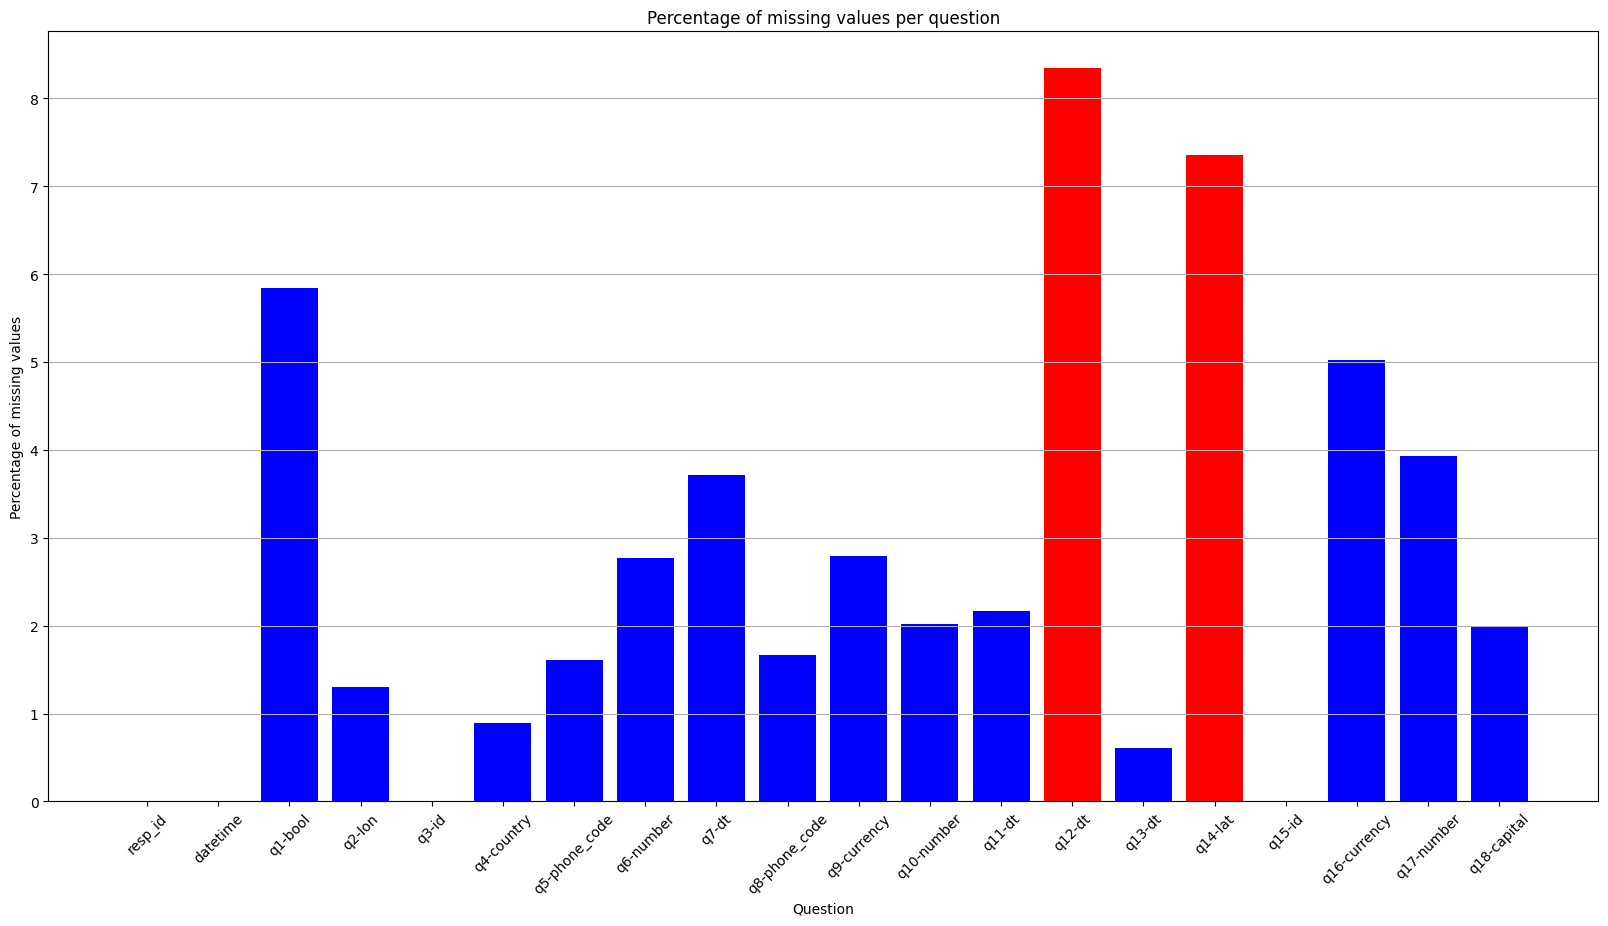

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext google.colab.data_table

df = pd.read_csv('https://github.com/WincAcademy/practice_data/raw/main/data/winc/questionnaire_data/qstn-a.csv')
df.head()

# 1. remove the first column
# display(df.columns)
df2 = df.drop(columns=["Unnamed: 0"])
df2

# Column: "resp. id"
# Let's rename it
df3 = df2.rename(columns={"resp. id": "resp_id"})
df3.head()

# 2. make a vertical bar chart with a bar for each column
fig, ax = plt.subplots()


questions = df3.columns
percent_missing = df3.isnull().mean() * 100


# 3. if a column has more than 6 percent missing: make it red
colors = ["blue" if pct <= 6 else "red" for pct in percent_missing]

ax.bar(questions, percent_missing, color=colors)

# Make x labels readable
plt.xticks(rotation=45)

# 4. add labels for the x- and y-axis
plt.xlabel("Question")

plt.ylabel("Percentage of missing values")

# 5. add a title
plt.title("Percentage of missing values per question")


# 6. add horizontal grid lines
ax.grid(True, axis="y")


fig.set_size_inches(20,10) # Make chart a little bigger

plt.show()



The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


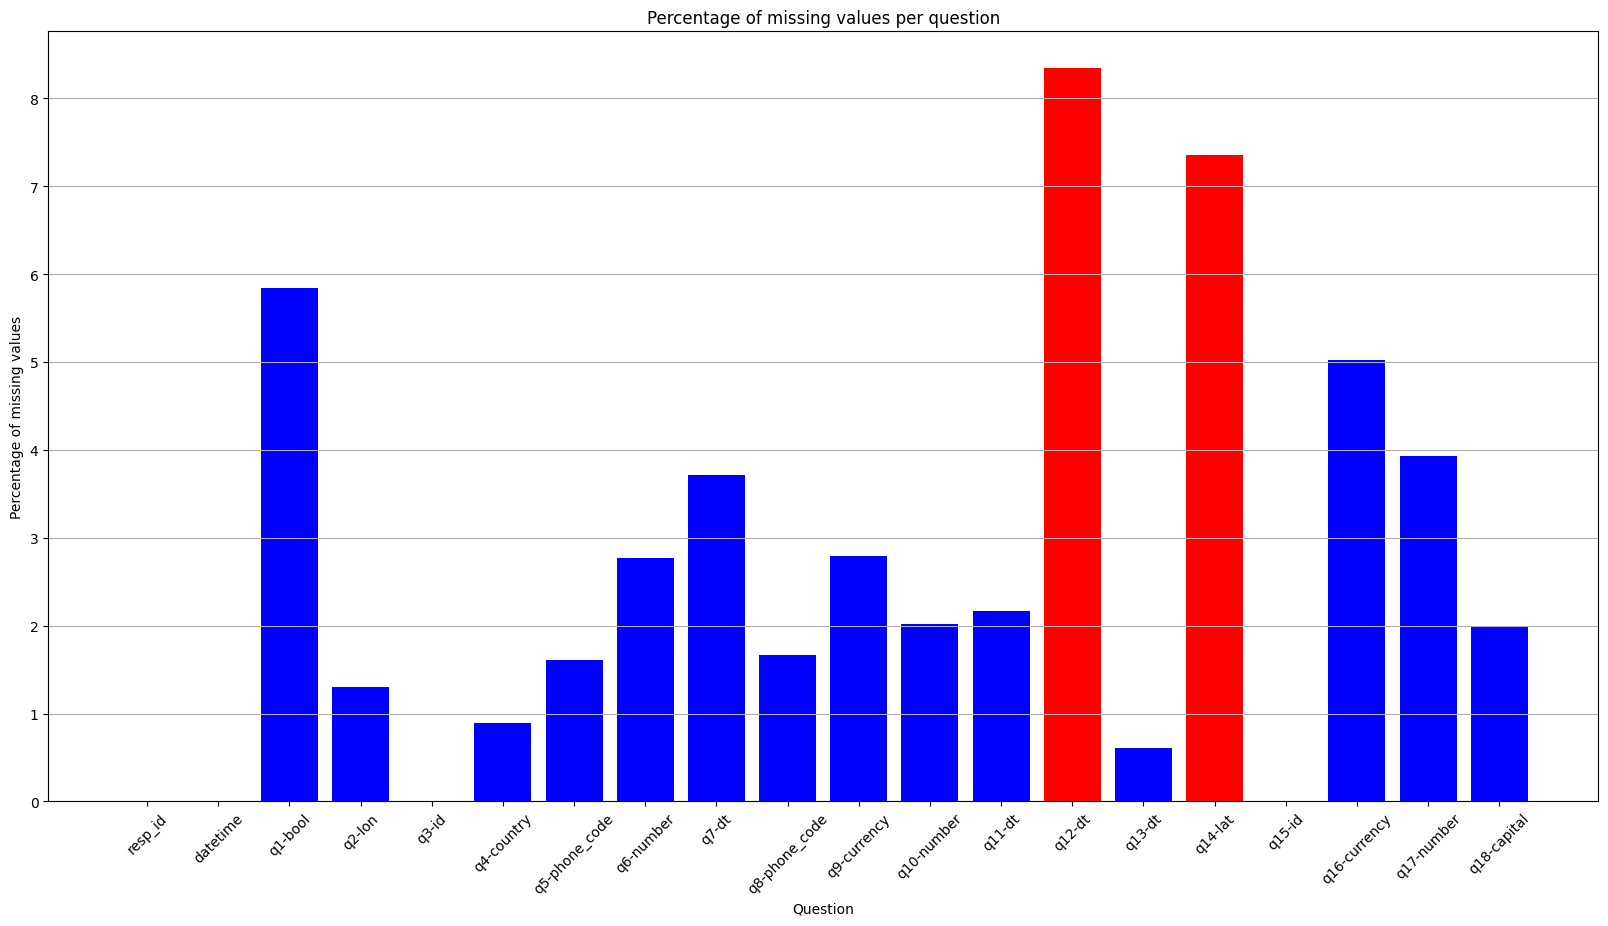

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import data_table
data_table.enable_dataframe_formatter()
%load_ext google.colab.data_table

df = pd.read_csv('https://github.com/WincAcademy/practice_data/raw/main/data/winc/questionnaire_data/qstn-a.csv')
df.head()

# 1. remove the first column
# display(df.columns)
df2 = df.drop(columns=["Unnamed: 0"])
df2

# Column: "resp. id"
# Let's rename it
df3 = df2.rename(columns={"resp. id": "resp_id"})
df3.head()

%reload_ext google.colab.data_table
# 2. make a vertical bar chart with a bar for each column
fig, ax = plt.subplots()


questions = df3.columns
percent_missing = df3.isnull().mean() * 100


# 3. if a column has more than 6 percent missing: make it red
colors = ["blue" if pct <= 6 else "red" for pct in percent_missing]

ax.bar(questions, percent_missing, color=colors)

# Make x labels readable
plt.xticks(rotation=45)

# 4. add labels for the x- and y-axis
plt.xlabel("Question")

plt.ylabel("Percentage of missing values")

# 5. add a title
plt.title("Percentage of missing values per question")


# 6. add horizontal grid lines
ax.grid(True, axis="y")


fig.set_size_inches(20,10) # Make chart a little bigger

plt.show()

######################################################################################################################
# to comment (or undo comments) several lines at once -> select -> Ctrl /

# STEP 7 For each column:
    # 1. find any non-default missing values (there may be more than one)
    # 2. decide what default NULL values to replace them with
    # 3. replace the missing values
    # 4. calculate the percentage of missing value

    # Tactics:
    # A. looking at all unique values
    # B. sorting and looking at the edges
    # C. casting to a type
    # D. looking at the frequency

# Niels wrote functions to call to prevent repeating oneselves
# Also Niels checked all the tactics on the columns and created an function
# that runs all the tactics (A,B,C and D)

# Started with creating an orderly way present the output.

# code for creating a nice outlook in the output.
def print_separator(sep, num, msg):  # sep -> the separator symbol
  print("\n")                        # num -> total number
  print(sep * num)                   # msg -> message
  print(f"{msg}")
  print(sep * num)

# below the several codes for each tactic in order

# A. looking at all unique values
def look_at_unique_values(column):
  unique_values_cutoff = 50  # how many
  unique_values = column.unique()
  num_unique_values = len(unique_values)
  if num_unique_values == len(column): # if True, each value in the column is unique
    print(f"Each value in the column is unique (total: {num_unique_values})")
  elif num_unique_values < unique_values_cutoff:
    print(f"Less than {unique_values_cutoff} unique values:")
    # We may get an error when sorting
    try:
      sorted = np.sort(unique_values)
      print("Values are sorted")
      display(list(sorted)) # list is more clear
    except:
      print("Could not sort values")
      display(list(unique_values))
  else:
    print(f"More than {unique_values_cutoff} unique values (total: {num_unique_values})")

# B. sorting and looking at the edges
# outer function:
def look_at_edges(df, column_name):
  # inner function -> can access variables from its outer function due to to Python's closure mechanism
  def show_head_and_tail(values):
      num_items_to_slice = 10
      display(list(values)[:num_items_to_slice])
      display(list(values)[-num_items_to_slice:])

  column = df[column_name]
  unique_values = column.unique()
  try:
      sorted = np.sort(unique_values)
      print("Unique values sorted, head and tail:")
      show_head_and_tail(sorted)
  except TypeError as error: #***
      print(f"Could not sort values: {error}") # variable error (Any) captures specific error instance, imprrtant info
      print("..so let's try filtering NULL values and then sorting") # NULL value can stand in the way, so filtering out the NULL values and sort again.
      non_null_uniques = df.loc[~df[column_name].isnull(), column_name].unique()             # ~negates: makes False what's True and the other way around..
      sorted = np.sort(non_null_uniques) # if still an error, get info from error instance   #.. so in this case it wiLL NOT give us the null values
      show_head_and_tail(sorted)
#*** TypeError as error does not mean that error is equal to 'TypeError'.***
#  Instead, it means that when a TypeError occurs, the ValueError object itself
#  will be assigned to the variable error. It is just a way to capture the specific error instance
#  so that you can access and use its information if needed.

# C. casting to a type
def cast_to_type(column, maybe_type):
  try:
    column.astype(maybe_type)
    print(f"Casting to {maybe_type} was successful")
  except ValueError as error:
    print(f"Could not cast to {maybe_type}: {error}") # again work with the info the error is given (see B)


# See the identation, the following code runs until print("\n")
# It's all part of the function find_non_default_missing_values
# which is the overall function running the defined functions above
def find_non_default_missing_values(df, column_name, maybe_type):
  long_separator_amount = 80
  short_separator_amount = 40

  print_separator("*", long_separator_amount, f"Finding non default missing values for column \"{column_name}\"")

  print(f"Column \"{column_name}\" has datatype: {df.dtypes[column_name]}")

  column = df[column_name]

  # A
  print_separator("-", short_separator_amount, "A: Looking at unique values")
  look_at_unique_values(column)

  # B
  print_separator("-", short_separator_amount, "B: Sorting and looking at the edges")
  look_at_edges(df, column_name)

  # C
  print_separator("-", short_separator_amount, f"C: Casting to type: {maybe_type}")
  cast_to_type(column, maybe_type)

  # D
  print_separator("-", short_separator_amount, "D: Looking at frequency")
  # D. looking at the frequency (no separate function)
  display(column.value_counts(dropna=False)) # dropna=False -> it should also count the missing values
  # value_counts()is an official method provided by pandas.
  # It is used to count the occurrences of unique values in a pandas Series (a single column of a DataFrame).
  print("\n")


# df3.head()
# display(list(df3.columns))
# find_non_default_missing_values(df3, "q1-bool", "bool")
# find_non_default_missing_values(df3, "resp_id", "string")


def replace_value(df, column_name, missing_old, missing_new): # function for replace to prevent repetitioin
  # ⚠️ Mutates df
  df[column_name] = df[column_name].replace({missing_old: missing_new})

# Helper functions
def display_default_null_values(df, column_name):
  nulls = df.loc[df[column_name].isnull()]
  #print(f"Number of default null values in \"{column_name}\": {len(nulls)}") # \ not necessary as column name is between {}
  print(f"Number of default null values in \"{column_name}\": {len(nulls)}")

# Easier to type
nat = np.datetime64('nat')

# ✅ resp_id
# find_non_default_missing_values(df3, 'resp_id',"string")

# ✅ datetime
# find_non_default_missing_values(df3, 'datetime',"datetime64")

# ✅ q1-bool
replace_value(df3, 'q1-bool', np.nan, False)
# find_non_default_missing_values(df3, 'q1-bool',"bool")
# display_default_null_values(df3,"q1-bool")



# # ✅ q2-lon
# replace_value(df3, 'q2-lon', 0, np.nan)
# # find_non_default_missing_values(df3, 'q2-lon', "float64")

# # ✅ q3-id
# replace_value(df3, 'q3-id', "no-id", None)
# # find_non_default_missing_values(df3, 'q3-id',"string")

# # ✅ q4-country
# replace_value(df3, 'q4-country', np.nan, None)
# # find_non_default_missing_values(df3, 'q4-country',"string")

# # ✅ q5-phone_code
# replace_value(df3, 'q5-phone_code', np.nan, None)
# replace_value(df3, 'q5-phone_code', "**", None)
# replace_value(df3, 'q5-phone_code', "***", None)
# # find_non_default_missing_values(df3, 'q5-phone_code',"string")

# # ✅ q6-number: nan, so correct missing value
# # find_non_default_missing_values(df3, 'q6-number',"float64")

# # ✅ q7-dt
# replace_value(df3, 'q7-dt', np.nan, nat)
# # find_non_default_missing_values(df3, 'q7-dt',"datetime64")

# # ✅ q8-phone_code
# replace_value(df3, 'q8-phone_code', np.nan, None)
# replace_value(df3, 'q8-phone_code', "**", None)
# replace_value(df3, 'q8-phone_code', "***", None)
# # find_non_default_missing_values(df3, 'q8-phone_code',"string")

# # ✅ q9-currency
# replace_value(df3, 'q9-currency', np.nan, None)
# replace_value(df3, 'q9-currency', "unknown", None)
# # find_non_default_missing_values(df3, 'q9-currency',"string")

# # ✅ q10-number: nan, so correct missing value
# # find_non_default_missing_values(df3, 'q10-number',"float64")

# # ✅ q11-dt
# replace_value(df3, 'q11-dt', np.nan, nat)
# # find_non_default_missing_values(df3, 'q11-dt',"datetime64")

# # ✅ q12-dt
# replace_value(df3, 'q12-dt', np.nan, nat)
# # find_non_default_missing_values(df3, 'q12-dt',"datetime64")

# # ✅ q13-dt
# replace_value(df3, 'q13-dt', np.nan, nat)
# # find_non_default_missing_values(df3, 'q13-dt',"datetime64")

# # ✅ q14-lat: nan, so correct missing value
# # find_non_default_missing_values(df3, 'q14-lat',"float64")

# # ✅ q15-id
# replace_value(df3, 'q15-id', "no-id", None)
# # find_non_default_missing_values(df3, 'q15-id',"string")

# # ✅ q16-currency
# replace_value(df3, 'q16-currency', np.nan, None)
# replace_value(df3, 'q16-currency', "unknown", None)
# # find_non_default_missing_values(df3, 'q16-currency',"string")

# # ✅ q17-number: nan, so correct missing value
# # find_non_default_missing_values(df3, 'q17-number',"float64")

# # ✅ q18-capital:
# replace_value(df3, 'q18-capital', np.nan, None)
# replace_value(df3, 'q18-capital', "False", None) # ⚠️ The STRING "False", not False
# # find_non_default_missing_values(df3, 'q18-capital',"string")
